__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/12_Review_and_Visualize.ipynb)__

# Review and visualize
Review and visualize data that meets your criteria. <br>
This notebook raises errors for demonstration purpose.
* `plot`: Easier plot
* `check_mask`: Count rows filtered by a binary mask. Raises an error, if the number is unexpected.
* `specials`: Returns rows representing all special values per column.
* `sample`: Returns some sample rows: beginning + end + specials + random rows.
* `search_str`: Searches all str columns of a dataframe. Useful for development and debugging.
* `grid`: Visualize with dtale.
* `memory_consumption`: Returns the memory consumption of Python objects.

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = D:\Dropbox
environment['lib_path']     = D:\Dropbox\31_Projekte\01_Python\libs
Start Time: 23:10:41


In [2]:
import numpy      as np
import pandas     as pd 
#import bpyth      as bpy

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
pak.Config.set('VERBOSE', True)

grid = pak.grid

# copy_on_write
pd.set_option("mode.copy_on_write", True)

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions



## plot(): Easier plot

In [3]:
blab.help(pak.plot)

<class 'IPython.core.display.Markdown'>


<span style="font-size:larger;">plot(data, x=None, secondary_y=False, ylabel=None, subplots=False, figsize=None, inaccurate_limit=10000, **kwargs):</span>

Plots data. All parameters are passed to pandas.DataFrame.plot, but 
* data:             The data to plot. DataFrame, or list of Series, or any other data 
                    which can be converted to DataFrame by the pandasklar dataframe function.
                    Non-numeric columns are ignored (even for column positions). 
* x:                Which column to be used as x-axis. Column name or column position.
                    x=None -> The index is used as x.   
* secondary_y:      Which columns to plot on the secondary y-axis. 
                    Column name, column position or list of column names.
* figsize:          Size of a figure object. Default is (16,3) or (16,4), depending on the data.
* inaccurate_limit: From what size should the data be thinned randomly.
                    Uses pandasklars sample function, so minimums and maximums are kept.     

In [4]:
# Several types of random numbers, with parameters
size = 100
a = pak.random_series( size, 'ascending'                    )
b = pak.random_series( size, 'ascending'                    )
c = pak.random_series( size, 'descending'                   )
d = pak.random_series( size, 'descending'                   )
e = pak.random_series( size, 'perlin',     freq=2           )
f = pak.random_series( size, 'perlin',     freq=[16,1,8,1]  )
g = pak.random_series( size, 'perlin',     freq=[4,1,8,128] )

df = pak.dataframe( (a,b,c,d,e,f,g), verbose=False )
pak.sample(df)

,A,B,C,D,E,F,G
0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
9,0.115096,0.170817,0.861395,0.899277,-0.076104,-0.391541,-1.000000
34,0.303236,0.288229,0.742700,0.447769,-1.000000,0.084370,-0.351684
66,0.361196,0.416059,0.721489,0.425136,0.100814,-0.849220,-0.200265
78,0.457680,0.548463,0.620521,0.355806,-0.149105,-1.000000,-0.277826
85,0.684388,0.620823,0.369244,0.281547,-0.305687,0.286514,0.087515
91,0.880775,0.837138,0.154007,0.098993,-0.299165,-0.331579,0.592416
99,1.000000,1.000000,0.000000,0.000000,-0.043929,0.031206,0.075385


<Axes: >

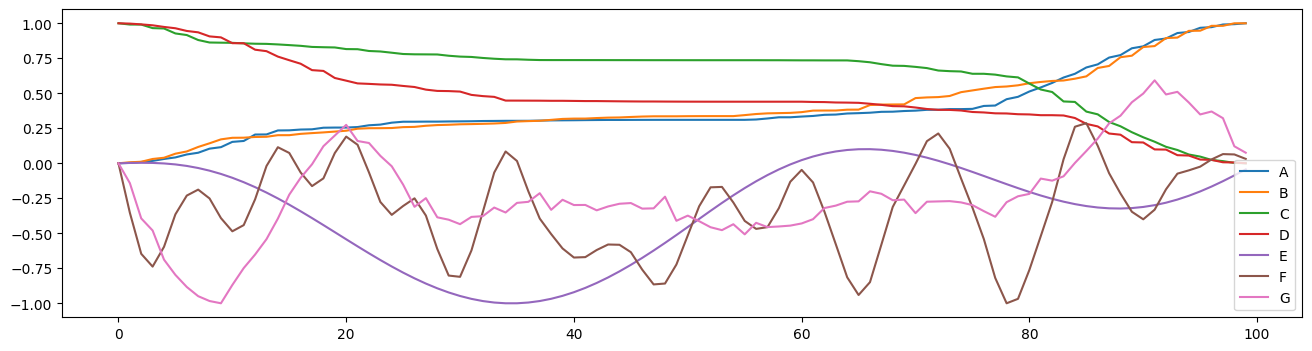

In [5]:
# just plot all together
%matplotlib inline
pak.plot(df)

<Axes: xlabel='G'>

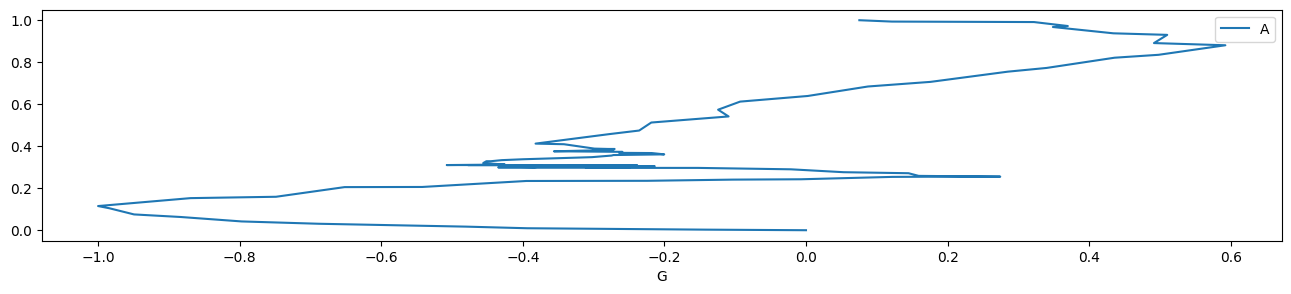

In [6]:
# plot 2 Series, use different y-axis
%matplotlib inline
pak.plot(df.A, df.G)

<Axes: >

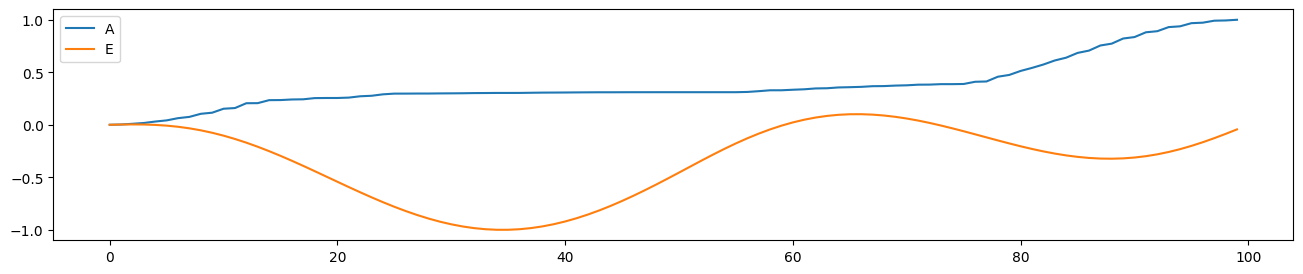

In [7]:
# plot E (Perlin) and A (ascending)
%matplotlib inline 
pak.plot(df[list('AE')])

<Axes: xlabel='A'>

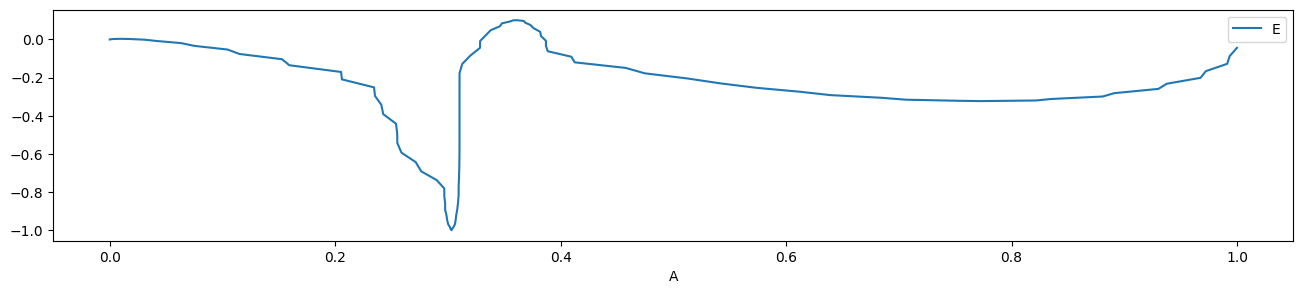

In [8]:
# plot E using A as x-Axis
%matplotlib inline 
pak.plot(df[list('AE')], x='A')

## specials(): Rows representing all special values per column

In [9]:
?pak.specials

Signature:
pak.specials(
    df,
    find=['head', 'first', 'min', 'most', 'max', 'nan', 'last', 'tail'],
    indicator=None,
    sort='index',
)
Docstring:
Returns rows representing all special values per column.
The resulting dataframe has the same minimums and maximums per column as the input dataframe, 
and if a column in the input contains NaNs the result will contain NaNs as well.
* find: List of what values are searched. 
  Possible values: 'head','first','min','most','max','nan','last','tail'
* indicator: Show additional column with a note, why the row is in the result
File:      d:\dropbox\31_projekte\01_python\88_pycharm\pandasklar\src\pandasklar\subsets.py
Type:      function

In [10]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))

In [11]:
a = pak.specials(df6, indicator='n')
a

,first_name,age,age_class,postal_code,birthplace,secret,features,history,n
0,Christina,30,30,66312,Bremen,TaJoYO,"{r, v}","[c, b, a]",head secret_first postal_code_first first_name...
25,Sigrid,20,20,<NA>,Bremen,0NC9o54i15,"{A, g, k}",[],postal_code_nan age_min age_class_min age_clas...
29,Angelika,42,40,77129,Berlin,uBWÄw,"{A, N, R, B, K}","[b, b, a, b]",age_max age_class_max birthplace_min birthplac...
122,Tim,33,30,57076,Berlin,qNwEW,"{2, F, Z, Q}","[c, b, a]",first_name_most age_class_first age_class_most...
244,Adolf,29,20,19023,Bremen,yÄS1UnB,"{p, o, V, q}","[A, x]",first_name_min age_class_min age_class_last bi...
293,Zoe,28,20,22810,Bremen,BYHurI,"{E, c, a}","[A, x]",first_name_max age_class_min age_class_last bi...
1142,Mika,27,20,54068,<NA>,jh1Öhg,"{2, E}","[a, b, c]",postal_code_most age_class_min age_class_last ...
1192,Lilli,37,30,99930,<NA>,iXibIXEn,"{y, g, k, Y}","[A, B, C, C]",postal_code_max age_class_first age_class_most...
1540,Jutta,31,30,28278,Bremen,9xs8i8uH,{},"[a, b, c]",features_min
1990,Tim,41,40,49695,Berlin,eVü3äjGJ7,"{p, h}","[A, B, C]",features_most


## sample(): Returns some sample rows

In [12]:
?pak.sample

Signature: pak.sample(df, size=None)
Docstring:
Returns some sample rows.
Always the beginning and the end, 
plus the other specials() --see there--,
plus some random rows.
* size: Number of rows to return. If size=None, all specials() are returned.
File:      d:\dropbox\31_projekte\01_python\88_pycharm\pandasklar\src\pandasklar\subsets.py
Type:      function

In [13]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))
df = df4

In [14]:
pak.sample(df6,15)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
1,Annette,23,20,52287,Berlin,nMJv7,"{G, e, p, U, f}","[A, C, C, B]"
20,Berndt,30,30,<NA>,Bremen,IeNqASDi,"{T, R, P, x, J}",[]
44,Janina,20,20,94630,Bremen,iI5cJmE,"{p, e}","[A, C, C, B]"
64,Adolf,32,30,37970,Bremen,USök1uA,"{d, Q, 5, r}","[c, b, a]"
79,Claus,42,40,71950,Bremen,CaFr6YzzWa,"{X, a}","[A, B, C]"
143,Zoe,23,20,17949,Bremen,ü5FüzPXzfZ,"{I, f, o, x}","[A, B, C, C]"
335,Jana,27,20,85967,<NA>,8RSQou5,"{N, L, V, c, x}","[c, b, a]"
492,Rudolf,29,20,31776,<NA>,Vn1xVu,{},"[b, b, a, b]"
1438,Stephan,34,30,82372,<NA>,jälNwi,"{T, l}","[A, B, C]"


In [15]:
pak.sample(df3,1005)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
1,Annette,23,20,52287,Berlin,nMJv7,"{G, e, p, U, f}","[A, C, C, B]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
3,Heinz,30,30,84999,Berlin,iaOCXZ2Öe,"{y, R, v}","[c, b, a]"
4,Meik,29,20,48702,<NA>,o4üB5älw,"{i, z, K}","[A, B, C, C]"
5,Vivien,34,30,53757,Berlin,bbÜadz4,"{L, k, l, d, U}","[A, B, C]"
6,Edith,35,30,99722,<NA>,özUZ7v,"{R, H, G}","[A, x]"
7,Celine,27,20,47104,Bremen,öo43röP,"{V, Z, w, a, f}","[a, b, c]"
8,Sophie,30,30,94574,Bremen,xYh9Bo,"{Q, 5, Y}","[b, b, a, b]"
9,Heidi,35,30,70290,Berlin,HZamIj,"{z, Z, s, G}","[A, A, A]"


## search_str(): Searches all str columns of a dataframe

In [16]:
?pak.search_str

Signature: pak.search_str(df, find, without=[])
Docstring:
Searches all str columns of a dataframe.
Useful for development and debugging.
* find:    What is to be found?                  String or list of strings.
* without: Which columns should not be searched? String or list of strings.    
File:      d:\dropbox\31_projekte\01_python\88_pycharm\pandasklar\src\pandasklar\develop.py
Type:      function

In [17]:
# create mask: most frequent first_name
find = ['Hamburg', pak.most_freq_elt(df.first_name)]
print('search for',find)

search for ['Hamburg', 'Adolf']


In [18]:
pak.search_str(df, find)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
64,Adolf,32,30,37970,Bremen,USök1uA,"{d, Q, 5, r}","[c, b, a]"


## check_mask(): Count rows filtered by a binary mask

In [19]:
?pak.check_mask

Signature:
pak.check_mask(
    df,
    mask,
    expectation_min=None,
    expectation_max=None,
    msg='',
    stop=True,
    manually=False,
    verbose=None,
)
Docstring:
Count rows filtered by a binary mask.
Raises an error, if the number is unexpected.
* manually:    For debugging: If you just want to see the effect of a mask, without raising anything, add manually=True.

Examples:
check_mask( df, mask )         # just show the number of rows   
check_mask( df, mask, 2000 )   # checks for about 2000 rows (if not 0: not more than double, not less than half)
check_mask( df, mask, 0 )      # checks for exactly 0 rows    
check_mask( df, mask, 10, 50)  # checks for 10..50 rows

Example with later raise:
error = check_mask(df, mask, 214, stop=False)        
grid(df, mask, error)        
bpy.raise_if(error)
File:      d:\dropbox\31_projekte\01_python\88_pycharm\pandasklar\src\pandasklar\develop.py
Type:      function

In [20]:
# define mask
mask = (df.age >= 30)  &  (df.age < 40) 
#df[mask]

In [21]:
# just show the number of rows
pak.check_mask(df, mask)

check_mask:  51 rows


In [22]:
# checks for about 50 rows
pak.check_mask(df, mask, 50)

check_mask:  51 rows


In [23]:
# checks for about 50 rows
pak.check_mask(df, mask, 50, verbose=True)

check_mask:  51 rows


In [24]:
# checks for 0..100 rows
pak.check_mask(df, mask, 0, 100)

check_mask:  51 rows


## grid(): Visualize with dtale

In [25]:
?grid

Signature:
grid(
    df,
    mask=None,
    error='€€€',
    color='blue',
    backend=None,
    without=None,
    **kwargs,
)
Docstring:
Visualization of a DataFrame using dtale.
* df:       DataFrame to show
* mask:     Binary mask, function or Searchstring to reduce the number of rows
* error:    Error message
* color:    Color of the error message.
* backend:  'dtale' or None for dTale
* without:  Columns to ignore
* kwargs: Options for dtale. See https://github.com/man-group/dtale#instance-settings
          Caution: This will affect all grids in this notebook...
dtale may not work in a multiscreen setting on windows.

=== Examples ===
grid(df)                        # show all rows
grid(df,mask)                   # show with binary mask    
grid(df,sample)                 # show with functionally mask

=== For error indication after check_mask ===
error = check_mask(df, mask, 900, stop=False)
grid(df, mask, error) 
and later: raise_if(error)
File:      d:\dropbox\31_projekte\01_p

In [26]:
# show
grid(df)

100 rows


,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
1,Annette,23,20,52287,Berlin,nMJv7,"{G, e, p, U, f}","[A, C, C, B]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
3,Heinz,30,30,84999,Berlin,iaOCXZ2Öe,"{y, R, v}","[c, b, a]"
4,Meik,29,20,48702,<NA>,o4üB5älw,"{i, z, K}","[A, B, C, C]"
...,...,...,...,...,...,...,...,...
95,Paul,27,20,32691,Bremen,ÖK4ACwEöAA,"{b, F, P, v}",[]
96,Eileen,34,30,48687,Berlin,ÖRÄiIuVrcK,"{M, s}","[A, C, C, B]"
97,Kim,31,30,99487,<NA>,LnIEm,"{z, K}",[]
98,Julian,26,20,50861,Bremen,tMöWd,"{V, B, s, 5}","[a, b, c]"


### grid(): Use mask

In [27]:
# Function as mask
grid(df, pak.sample)

11 rows out of 100


,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
6,Edith,35,30,99722,<NA>,özUZ7v,"{R, H, G}","[A, x]"
20,Berndt,30,30,<NA>,Bremen,IeNqASDi,"{T, R, P, x, J}",[]
30,Yvonne,36,30,30835,<NA>,öÜ4A2d,"{S, 1, 5}","[A, B, C, C]"
44,Janina,20,20,94630,Bremen,iI5cJmE,"{p, e}","[A, C, C, B]"
64,Adolf,32,30,37970,Bremen,USök1uA,"{d, Q, 5, r}","[c, b, a]"
68,Nicolas,25,20,44017,Bremen,üzrQ3iJ,"{Z, Q, t, o}","[A, B, C]"
71,Ursula,29,20,90947,Berlin,0m8ruPPDW,"{o, f, c, n}","[A, A, A]"
79,Claus,42,40,71950,Bremen,CaFr6YzzWa,"{X, a}","[A, B, C]"


In [28]:
# Binary mask
mask = df.age > 25
grid(df, mask)

89 rows out of 100


,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
3,Heinz,30,30,84999,Berlin,iaOCXZ2Öe,"{y, R, v}","[c, b, a]"
4,Meik,29,20,48702,<NA>,o4üB5älw,"{i, z, K}","[A, B, C, C]"
5,Vivien,34,30,53757,Berlin,bbÜadz4,"{L, k, l, d, U}","[A, B, C]"
...,...,...,...,...,...,...,...,...
95,Paul,27,20,32691,Bremen,ÖK4ACwEöAA,"{b, F, P, v}",[]
96,Eileen,34,30,48687,Berlin,ÖRÄiIuVrcK,"{M, s}","[A, C, C, B]"
97,Kim,31,30,99487,<NA>,LnIEm,"{z, K}",[]
98,Julian,26,20,50861,Bremen,tMöWd,"{V, B, s, 5}","[a, b, c]"


### grid() options
Some grid options are global, e.g. max_column_width. If you set this option to a value later in your notebook, all grids in the notebook are rendered with this column_width. If you find a way to change this, send me a message.

In [29]:
# global Settings
pak.set_grid(max_column_width=200)

In [30]:
# show 
grid(df)

100 rows


,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
1,Annette,23,20,52287,Berlin,nMJv7,"{G, e, p, U, f}","[A, C, C, B]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
3,Heinz,30,30,84999,Berlin,iaOCXZ2Öe,"{y, R, v}","[c, b, a]"
4,Meik,29,20,48702,<NA>,o4üB5älw,"{i, z, K}","[A, B, C, C]"
...,...,...,...,...,...,...,...,...
95,Paul,27,20,32691,Bremen,ÖK4ACwEöAA,"{b, F, P, v}",[]
96,Eileen,34,30,48687,Berlin,ÖRÄiIuVrcK,"{M, s}","[A, C, C, B]"
97,Kim,31,30,99487,<NA>,LnIEm,"{z, K}",[]
98,Julian,26,20,50861,Bremen,tMöWd,"{V, B, s, 5}","[a, b, c]"


### grid(): Advanced Formating
See options on https://github.com/man-group/dtale#instance-settings

In [31]:
mask = df.age > 25
grid(df, mask, sort=[('first_name','ASC')], background_mode='heatmap-col-age')
#grid(df, mask, drop_index=True,)

89 rows out of 100


,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
3,Heinz,30,30,84999,Berlin,iaOCXZ2Öe,"{y, R, v}","[c, b, a]"
4,Meik,29,20,48702,<NA>,o4üB5älw,"{i, z, K}","[A, B, C, C]"
5,Vivien,34,30,53757,Berlin,bbÜadz4,"{L, k, l, d, U}","[A, B, C]"
...,...,...,...,...,...,...,...,...
95,Paul,27,20,32691,Bremen,ÖK4ACwEöAA,"{b, F, P, v}",[]
96,Eileen,34,30,48687,Berlin,ÖRÄiIuVrcK,"{M, s}","[A, C, C, B]"
97,Kim,31,30,99487,<NA>,LnIEm,"{z, K}",[]
98,Julian,26,20,50861,Bremen,tMöWd,"{V, B, s, 5}","[a, b, c]"


### grid(): Special cases

In [32]:
# No DataFrame
grid(None)

Nothing to show


In [33]:
# Empty DataFrame
d = pd.DataFrame()
grid(d)

No rows


In [34]:
# 100% filtered 
mask = df.age > 1000
grid(df,mask)

No rows, mask filters them all away


In [35]:
# 100% filtered, and this is good
mask = df.age > 1000
grid(df,mask, color='green')

No rows, mask filters them all away


In [36]:
# 100% filtered, and this is bad
mask = df.age > 1000
grid(df,mask, color='red')

No rows, mask filters them all away


### grid() & check_mask(): Show error rows and raise later

In [37]:
# define a mask that contains errors
# say our error is df.birthplace == 'Hamburg',
# we don't want that to happen,
# but if it happens we would like to see the rows
mask = df.birthplace == 'Hamburg'
pak.check_mask(df,mask)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
# checking for 0 raises an error, as we want.
# But we don't see the rows affected
pak.check_mask(df,mask, 0)

In [ ]:
# so we use this to show the error rows first
error = pak.check_mask(df,mask, 0, stop=False)
grid(df, mask, error) 

In [ ]:
# and raise later
bpy.raise_if(error)

## memory_consumption

In [ ]:
?pak.memory_consumption

In [ ]:
# All local variables
r = pak.memory_consumption( locals() )
r

In [ ]:
# If you give a DataFrame, it will return the column sizes
pak.memory_consumption( df )

# Spielwiese

In [38]:
df

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Ernst,36,30,71236,<NA>,IäsNdr,"{f, m, P, v}","[A, A, A]"
1,Annette,23,20,52287,Berlin,nMJv7,"{G, e, p, U, f}","[A, C, C, B]"
2,Anna,30,30,12106,<NA>,VüL7sÄüDiP,"{G, n, 3, F, E}",[]
3,Heinz,30,30,84999,Berlin,iaOCXZ2Öe,"{y, R, v}","[c, b, a]"
4,Meik,29,20,48702,<NA>,o4üB5älw,"{i, z, K}","[A, B, C, C]"
...,...,...,...,...,...,...,...,...
95,Paul,27,20,32691,Bremen,ÖK4ACwEöAA,"{b, F, P, v}",[]
96,Eileen,34,30,48687,Berlin,ÖRÄiIuVrcK,"{M, s}","[A, C, C, B]"
97,Kim,31,30,99487,<NA>,LnIEm,"{z, K}",[]
98,Julian,26,20,50861,Bremen,tMöWd,"{V, B, s, 5}","[a, b, c]"


In [46]:
import dtale
d = dtale.show(df)

In [47]:
d.open_browser()